- 발제주제: 워드임베딩 벡터의 차원축소 방법 (1)PCA
- 스터디 일자: 2022-05-14
- 발제자: 임지연
- 레퍼런스  
[1. wikibooks 실습코드](https://github.com/wikibook/textmining/blob/main/Ch%2006.%20%EC%B0%A8%EC%9B%90%EC%9D%98%20%EC%B6%95%EC%86%8C.ipynb)  
[2. The Mathematics Behind Principal Component Analysis](https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643)  
[3. Tidying up with PCA: An Introduction to Principal Components Analysis](https://towardsdatascience.com/tidying-up-with-pca-an-introduction-to-principal-components-analysis-f876599af383)  
[4. A geometric interpretation of the covariance matrix](https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)  
- 추가 참고  
[1. csr 희소행렬 표현방법](https://bkshin.tistory.com/entry/NLP-7-%ED%9D%AC%EC%86%8C-%ED%96%89%EB%A0%AC-Sparse-Matrix-COO-%ED%98%95%EC%8B%9D-CSR-%ED%98%95%EC%8B%9D)
- 발표순서  
[1.PCA의 특징](#Strengths-and-Limitations)  
[2.PCA의 수학적 의미](#Intuitions-from-Maths-in-PCA)  
[3.위키북스 예제코드](#Example-Codes-from-Textbooks)  
[4.한국어 예제코드](#Adaptiation-for-Korean-Word-Embeddings)


## Strengths and Limitations

### 차원축소 /PCA
  모델에 데이터를 넣고 학습을 진행할 때 데이터의 차원이 증가할 수록 데이터 포인트 간의 거리는 기하급수적으로 멀어진다.(차원의 저주) 이런 경우 다음과 같은 문제가 발생할 수 있음
  - 오버피팅 문제
  - 다중공선성 문제 (feature가 많을수록 개별 변수끼리 상관성 존재할 확률이 높아짐)
  - 학습시간이 증가함
  - 시각화의 직관성이 떨어짐<br></br>

PCA를 사용해 차원을 줄이고 데이터의 밀도를 높이면 차원의 저주로부터 오는 성능 문제나 시각화 문제를 해결할 수 있다. 추가적으로 데이터의 노이즈나 중복데이터를 필터링하는 효과를 얻게 된다. 동시에 PCA는 아래와 같은 약점도 존재한다.  
  - 해석의 어려움
  - 변수간 Scale에 민감함 (따라서 Standardization 사용)
<br></br>
<PCA 진행 순서>  
  1. 입력 데이터 세트의 공분산행렬 생성.  
  2. 공분산 행렬의 고유 벡터와 고유 값을 계산  
  3. 고유값이 가장 큰 순으로 K개 만큼 고유 벡터를 추출.  
  4. 고유값이 가장 큰 순으로 추출된 고유 벡터를 활용해 새로운 입력 데이터 변환.  

##Intuitions from Maths behind PCA

### Gometric feature of Covariance Matrix
- Covariance matrix는 데이터의 분포에 대한 정보를 종합적으로 들고 있는 행렬임
- Covariance marix의 원소를 통해 데이터의 분산 및 변수 간의 강도를 확인할 수 있음

### 1. 고유벡터 Eigenvector 의 의미
- 벡터는 크기(Magnitude)와 방향(Direction)을 지니고 있음.
- 벡터 X에 곱해지는 변환행렬 A는 벡터 X를 회전시키고 선형으로 늘리게 됨 (벡터의 크기와 방향을 모두 변화시킴)
- 그러나 어떤 변환행렬은 벡터X의 방향만을 변화시키게 된다. 예를 들어 아래 식을 만족하는 임의의 x, y값을 요소(element)로 하는 벡터 X와 변환행렬 A가 있다.  
$ 
A = \begin{pmatrix} 3 &\ 2 \\ 0 & 2 \end{pmatrix} \\ 
X = \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} \; where \; x_{i}^2 + y_{i}^2 = 1 
$  
여기서 T=AX를 그리면 아래와 같다.
어떤 X1은 크기와 방향이 모두 변했지만, y 좌표를 0으로 가지는 X2는 오직 선형적으로 길어질 (Stretch) 뿐 방향은 변하지 않는다.  
  
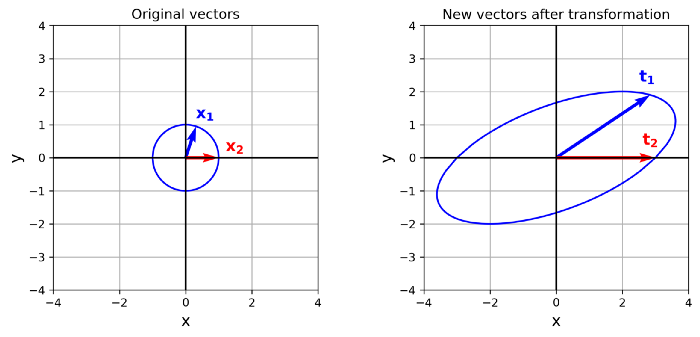

### 2. Eigenvector의 성질
- 대칭행렬($A^{T}$ = A)에 Eigenvector를 곱하면 Eigenvector의 방향은 타원의 장축과 단축이 된다. 
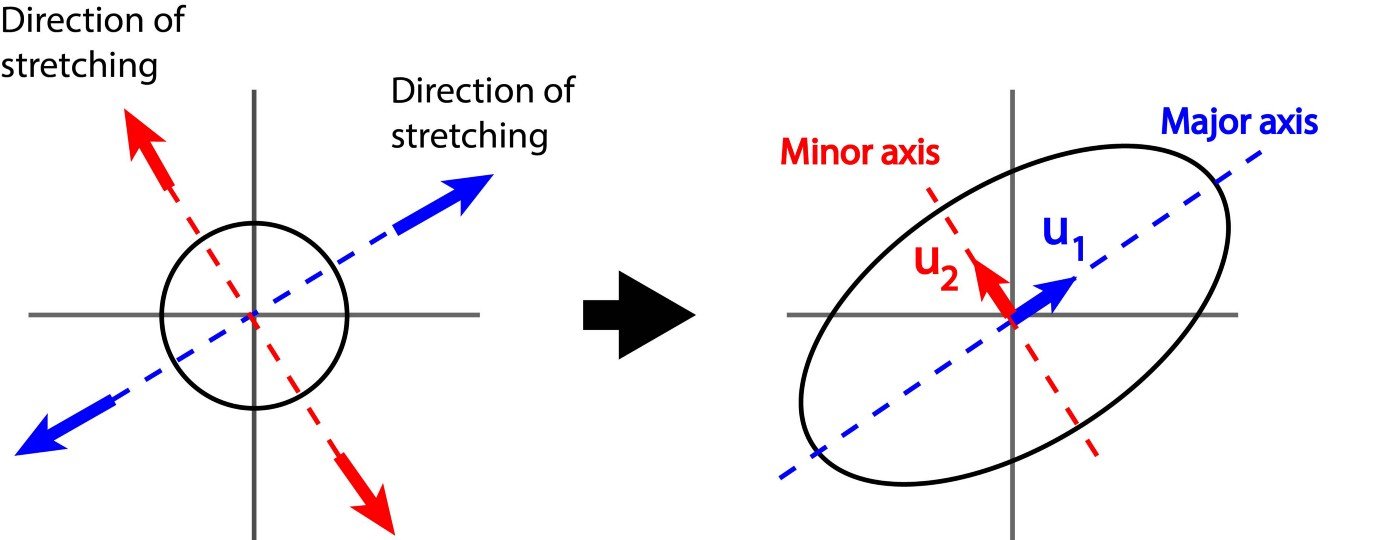

###3. Covariance Marix

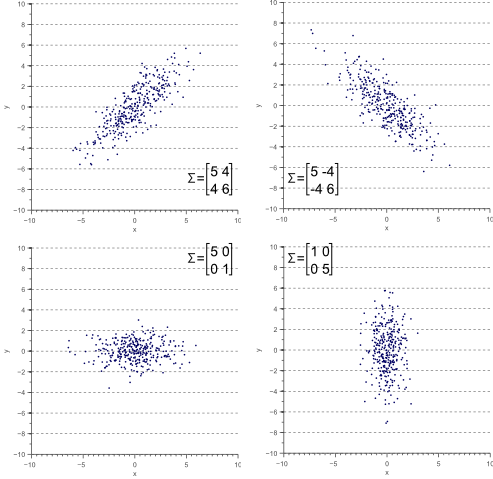

이러한 Covariance Matrix의 Eigenvector를 구하면 eigenvalue가 큰 순서대로 eigenvector의 방향은 데이터의 장축과 단축이 됨

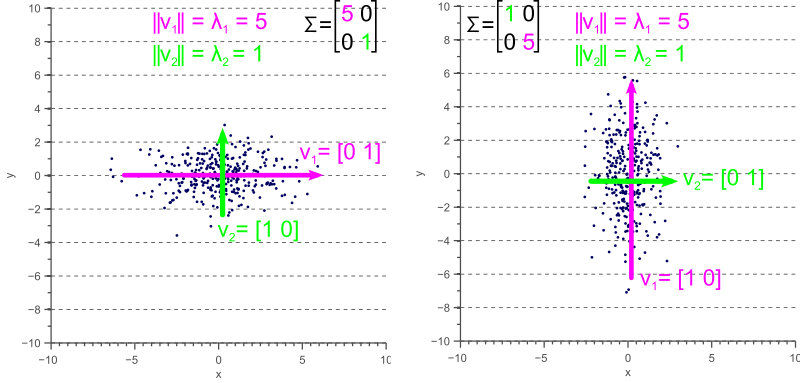

그러므로 Eigenvector를 구하면 해당 방향들이 데이터의 분산을 가장 잘 설명할 수 있는 축이다.  
차원이 높은 데이터는 Eigenvector를 구하고 그 Eigenvector들이 데이터의 분산을 많이 설명하는대로 (축의 길이가 긴 = eigenvalue가 높은) 데이터의 크기를 줄여나갈 수 있다.  


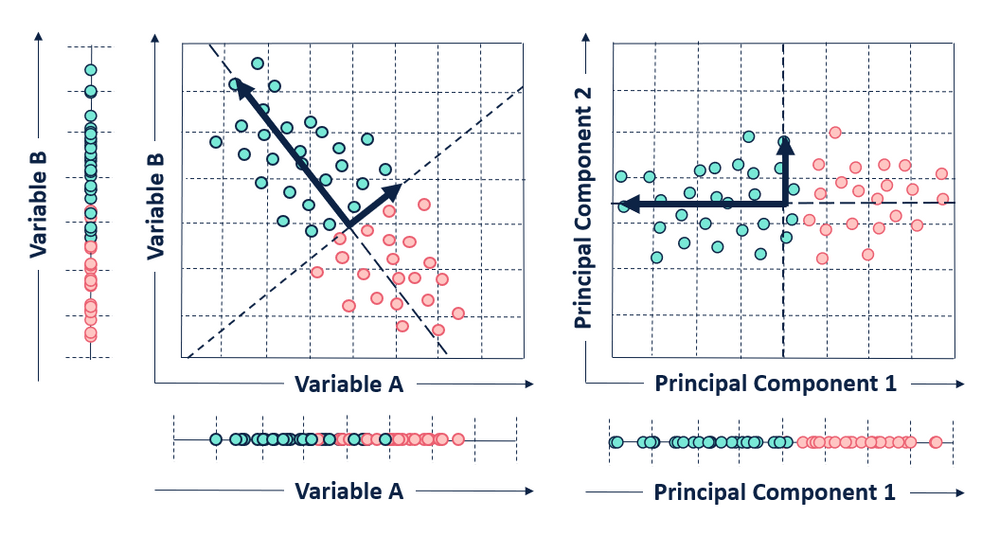

- 공분산행렬에서 p차원 행렬의 eigenvector 구하는 식은 람다에 대한 p차원의 다항식이 되게 된다
- 따라서 이 식은 최대 p개의 람다 해를 가지게 된다.
- 각 람다(eigenvalue)는 $X\vec{e}$가 설명하는 분산의 크기와 동일하기 때문에, 람다를 크기순으로 배열해 설명할 분산의 크기를 정할 수 있다. 

## Example Codes from the Textbook

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
##train
newsgroups_train = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers', 'quotes'), categories = categories) #메일 내용만으로 분류하기 위해 결정적인 힌트가 되는 부분은 삭제
##test
newsgroups_test = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers', 'quotes'), categories = categories)

In [ ]:
## bunch타입에서 가져온 data는 기사 내용이 담긴 리스트 형태, target은 1차원 numpy array 형태
X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [ ]:
## nltk패키지에서 불용어를 다운받음
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
cachedStopWords = stopwords.words('english')  ## 영어 불용어 리스트 (이 코드에선 굳이 필요없음)

In [ ]:
cachedStopWords[:5]    

['i', 'me', 'my', 'myself', 'we']

- RegexpTokenizer는 hyperparameter로 받은 정규표현식 pattern을 기준으로 토큰화를 수행한다
  - \w : 알파벳, 숫자, _ 중 하나의 문자
  - x{n,m}: x가 최소 n번 이상 최대 m번 이하로 반복


In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer  ## 단어의 원형으로 바꿔주는 함수 (한국어 형태소 분석기와 동일 역할)

RegTok = RegexpTokenizer("[\w]{3,}")    ## 문자,숫자,또는 언더바가 최소 3번 이상 반복될시 토큰으로 사용한다 
english_stops = set(stopwords.words('english'))   ## 직접 구축한 불용어 사전이라면 중복이 존재할 수 있어서 불용어사전을 집합으로 변경하는 것이 좋음

In [ ]:
def tokenizer(text):
  tokens = RegTok.tokenize(text.lower())  ##소문자로 이루어진, 알파벳/숫자/언더바 최소 3개 이상으로 이루어진 토큰 리스트
  words = [word for word in tokens if (word not in english_stops) and len(word) > 2]  ##불용어 거르기  (그런데 len(word)>2는 정규표현식으로 한번 걸렀기 때문에 굳이 필요없음)
  features = (list(map(lambda token: PorterStemmer().stem(token), words)))  ##각 단어를 원형으로 바꿔 리스트로 저장
  return features

In [ ]:
tfidf = TfidfVectorizer(tokenizer = tokenizer)
## train,test set을 tfidf벡터로 변환
x_train_tfidf = tfidf.fit_transform(X_train)   ## tfidf벡터는 scipy에서 압축된 희소행렬(csr_matrix) 형식으로 저장됨
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
x_train_tfidf.get_shape()    ##tfidf 행렬로 들어간 토큰은 약 2만 개 정도..

(2034, 19126)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(x_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(x_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.962
#Test set score: 0.768


In [ ]:
## tfidf행렬에 PCA 수행
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(x_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [ ]:
## 2000개 주성분을 선택했을 때 설명할 수 있는 정보의 양 확인
print('PCA Converted X shape:', x_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

PCA Converted X shape: (2034, 321)
Sum of explained variance ratio: 1.000


In [ ]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.962
#Test set score: 0.768


PCA로 주성분 2000개 정도로 축소한 경우에 원래의 정보는 하나도 유실되지 않았다.  
테스트셋에 적용한 결과는 차원축소 이전과 거의 차이가 없다

In [ ]:
## lasso를 이용한 feature selection 수행

lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) 
lasso_clf.fit(x_train_tfidf, y_train) 

print('#Train set score: {:.3f}'.format(lasso_clf.score(x_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', x_train_tfidf.shape[1]) 

#Train set score: 0.794
#Test set score: 0.719
#Used features count: 322 out of 19126


Lasso는 PCA보다 성능이 떨어지는 것을 확인할 수 있는데, PCA가 데이터를 가장 잘 설명할 수 있는 방향을 찾아 데이터를 전체적으로 압축하는 데 비해, Lasso는 데이터 자체를 변형하지 않고 의미있는 feature를 선택하는 방식을 사용한다. 때문에 정보의 손실량이 PCA보다 많아지고, 예측 정확도가 떨어진다. (물론 Penalty term을 변경해서 feature를 더 많이 남긴다면 성능을 더 높일 수는 있지 않을까?)

In [ ]:
## 그래서 준비했다..! 똑같은 feature 개수에서 PCA는 어떤 성능을 보이게 되는가?

pca = PCA(n_components=321, random_state=7)
x_train_pca = pca.fit_transform(x_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

## PCA로 축소된 벡터의 정보를 확인
print('PCA Converted X shape:', x_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))
## 모델 적합
LR_clf.fit(x_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(x_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 321)
Sum of explained variance ratio: 0.440
#Train set score: 0.875
#Test set score: 0.752


주성분을 321개로 줄이면 원데이터의 분산은 44%밖에 설명하지 못하지만, 2000개의 주성분을 사용했을 때와 test set에서의 성능은 크게 차이가 나지 않는 것으로 보인다.   
또한 Lasso보다 여전히 좋은 성능을 가지고 있는 것이 확인 가능하다.

추가) PCA를 사용할 때 주성분의 개수는 explained Variance를 원하는 수준으로 맞추거나, Scree Plot을 이용해 비교해서 계산할 수 있다. 